In [81]:
import pickle
from tqdm import tqdm_notebook as tqdm
import pandas
import numpy
import matplotlib
matplotlib.rcParams.update({'font.size': 18})

In [2]:
import os

In [3]:
entry_categories=dict()

In [4]:
for filename in tqdm(os.listdir('./data/dump')):
    if filename.startswith('metadata_'):
        data=pickle.load(open('./data/dump/%s'%filename,'rb'))
        for entry,meta_data in data.items():
            if meta_data['categories']==[]:
                continue
            entry_categories[entry]=meta_data['categories']

In [5]:
visit_count_df=pickle.load(open('./data/dump/merged_metadata.pkl','rb'))

In [6]:
visit_count_df['Title']=visit_count_df.index

In [7]:
visit_count_df.head()

,category_num,frequency,image_num,language_num,link_num,update,vandalism,in_degree,out_degree,page_len,Title
$1,4.0,7791.0,1.0,1.0,45.0,0.0,0.0,0.0,11.0,2476.0,$1
"$10,000_unsecured_visa_or_mastercards",0.0,980.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"$10,000_unsecured_visa_or_mastercards"
'O_Sole_Mio,0.0,897.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0,25.0,'O_Sole_Mio
(Don't_Fear)_The_Reaper,14.0,970.0,9.0,9.0,443.0,17.0,0.0,40.0,170.0,26292.0,(Don't_Fear)_The_Reaper
(I_Can't_Get_No)_Satisfaction,49.0,667.0,11.0,31.0,590.0,10.0,0.0,71.0,228.0,37360.0,(I_Can't_Get_No)_Satisfaction


In [8]:
len(visit_count_df)

72087

In [9]:
visit_count_df=visit_count_df[visit_count_df['Title'].isin(entry_categories)]

In [10]:
len(visit_count_df)

63782

In [11]:
visit_count_df.values.shape

(63782, 11)

In [12]:
category_visit_count=dict()
for value in visit_count_df.values:
    for c in entry_categories[value[-1]]:
        if c.startswith('Category:Wikipedia'):
            continue
        value2=numpy.array(list(value[1:-1])+[1])
        try:
            category_visit_count[c]+=value2
        except:
            category_visit_count[c]=value2

In [13]:
data=[]
for category, value in category_visit_count.items():
    data.append([category]+list(value))

In [14]:
["Category"]+list(visit_count_df.columns)[1:-1]+["Title Count"]

['Category',
 'frequency',
 'image_num',
 'language_num',
 'link_num',
 'update',
 'vandalism',
 'in_degree',
 'out_degree',
 'page_len',
 'Title Count']

In [15]:
category_visit_df=pandas.DataFrame(data,columns=["Category"]+list(visit_count_df.columns)[1:-1]+["Title Count"])

In [16]:
for column in list(visit_count_df.columns)[1:-1]:
    category_visit_df['Avg_'+column]=category_visit_df[column]/category_visit_df['Title Count']

In [120]:
def seperate_list(array, bins = 10):
    arrary1 = sorted(array)
    cut = []
    delta = len(arrary1) // bins
    print(delta)
    for j in range(0, bins):
        if len(cut)>0 and arrary1[delta * j]==cut[-1]:
            continue
        cut.append(arrary1[delta * j])
    cut.append(arrary1[-1])
    return cut

In [70]:
category_visit_df.columns

Index(['Category', 'frequency', 'image_num', 'language_num', 'link_num',
       'update', 'vandalism', 'in_degree', 'out_degree', 'page_len',
       'Title Count', 'Avg_frequency', 'Avg_image_num', 'Avg_language_num',
       'Avg_link_num', 'Avg_update', 'Avg_vandalism', 'Avg_in_degree',
       'Avg_out_degree', 'Avg_page_len', 'avg_frequency_bin'],
      dtype='object')

In [91]:
visit_count_df['frequency']=visit_count_df['frequency'].astype(int)

In [84]:
category_visit_df['Avg_frequency']=category_visit_df['Avg_frequency'].astype(int)

In [86]:
category_visit_df['avg_frequency_bin'] = pandas.cut(category_visit_df['Avg_frequency'], seperate_list(category_visit_df['Avg_frequency'].values,20))

7758


In [87]:
category_visit_df.head()

,Category,frequency,image_num,language_num,link_num,update,vandalism,in_degree,out_degree,page_len,...,Avg_frequency,Avg_image_num,Avg_language_num,Avg_link_num,Avg_update,Avg_vandalism,Avg_in_degree,Avg_out_degree,Avg_page_len,avg_frequency_bin
0,Category:Video signal,37717.0,48.0,224.0,1542.0,101.0,1.0,676.0,566.0,242978.0,...,4714,6.000000,28.000000,192.750000,12.625000,0.125000,84.500000,70.750000,30372.250000,"(4487, 6426]"
1,Category:Swimmers at the 1968 Summer Olympics,1115.0,38.0,53.0,907.0,8.0,0.0,72.0,103.0,51511.0,...,1115,38.000000,53.000000,907.000000,8.000000,0.000000,72.000000,103.000000,51511.000000,"(1034, 1138]"
2,Category:Bosporan Kingdom,1178.0,10.0,61.0,398.0,9.0,0.0,73.0,116.0,42025.0,...,1178,10.000000,61.000000,398.000000,9.000000,0.000000,73.000000,116.000000,42025.000000,"(1138, 1249]"
3,Category:1948 births,238778.0,854.0,3243.0,37322.0,2505.0,17.0,9066.0,12012.0,4862911.0,...,1836,6.569231,24.946154,287.092308,19.269231,0.130769,69.738462,92.400000,37407.007692,"(1668, 1853]"
4,Category:1991 songs,12232.0,53.0,137.0,2533.0,117.0,2.0,254.0,680.0,251507.0,...,1112,4.818182,12.454545,230.272727,10.636364,0.181818,23.090909,61.818182,22864.272727,"(1034, 1138]"


In [88]:
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
from datetime import datetime
import os
from tqdm import tqdm_notebook as tqdm
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas
import re
import os

In [89]:
len(category_visit_df)

155177

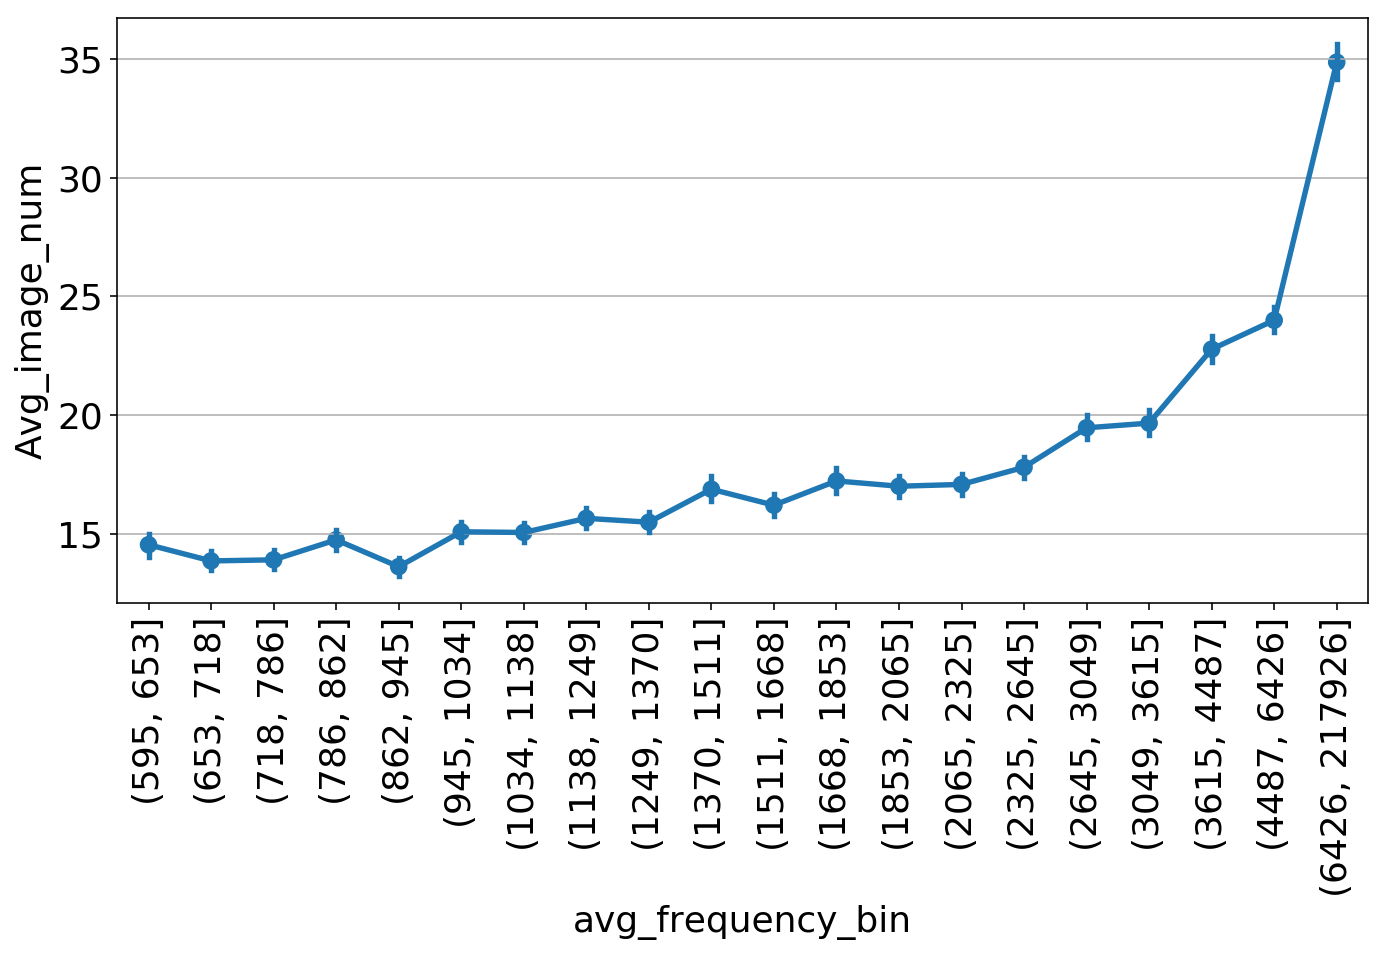

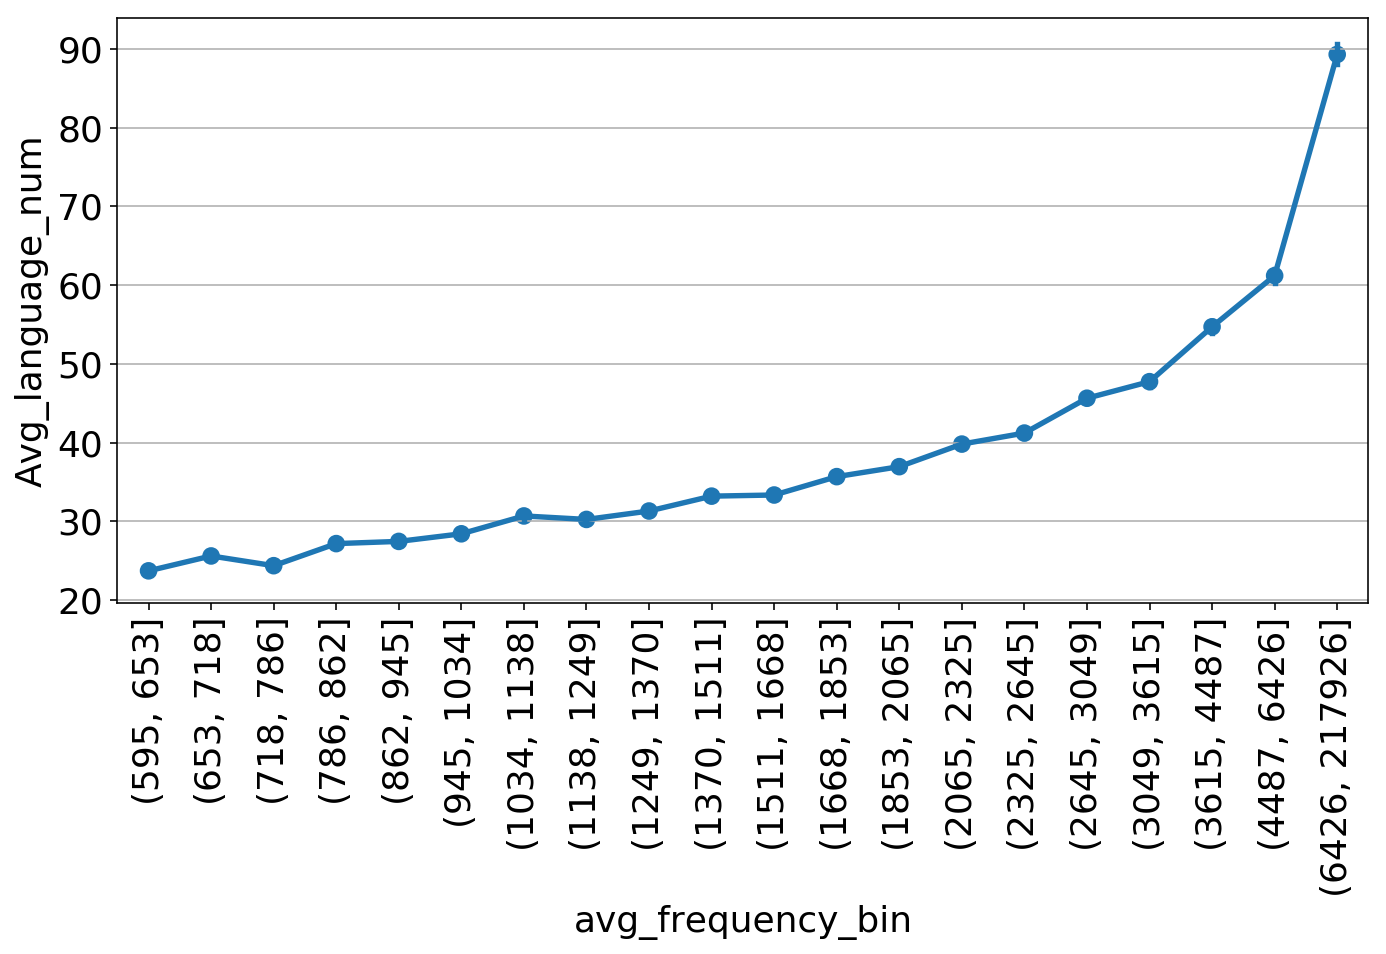

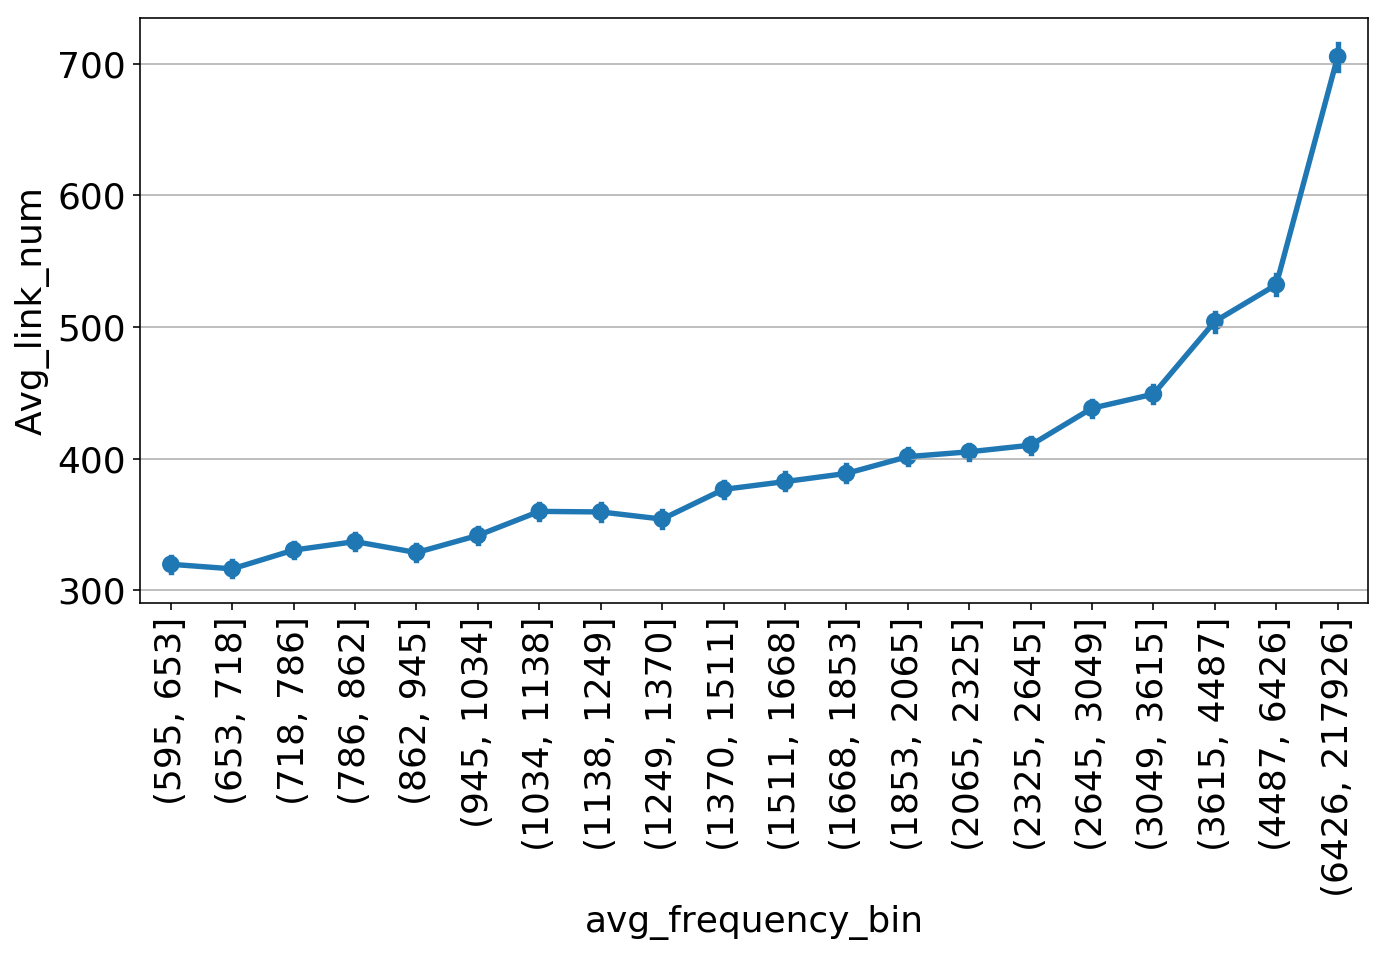

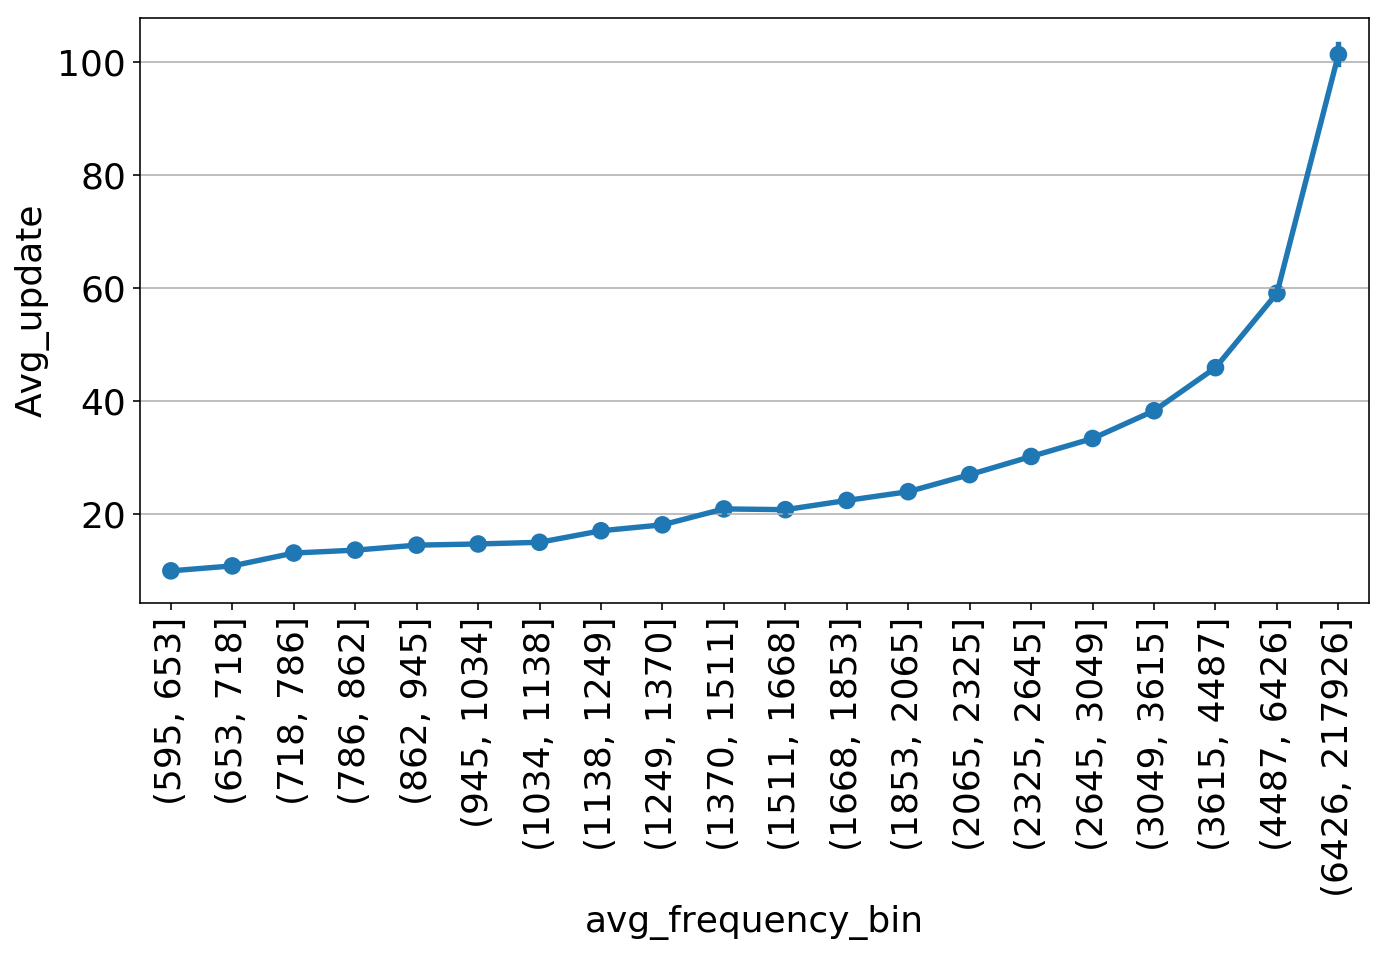

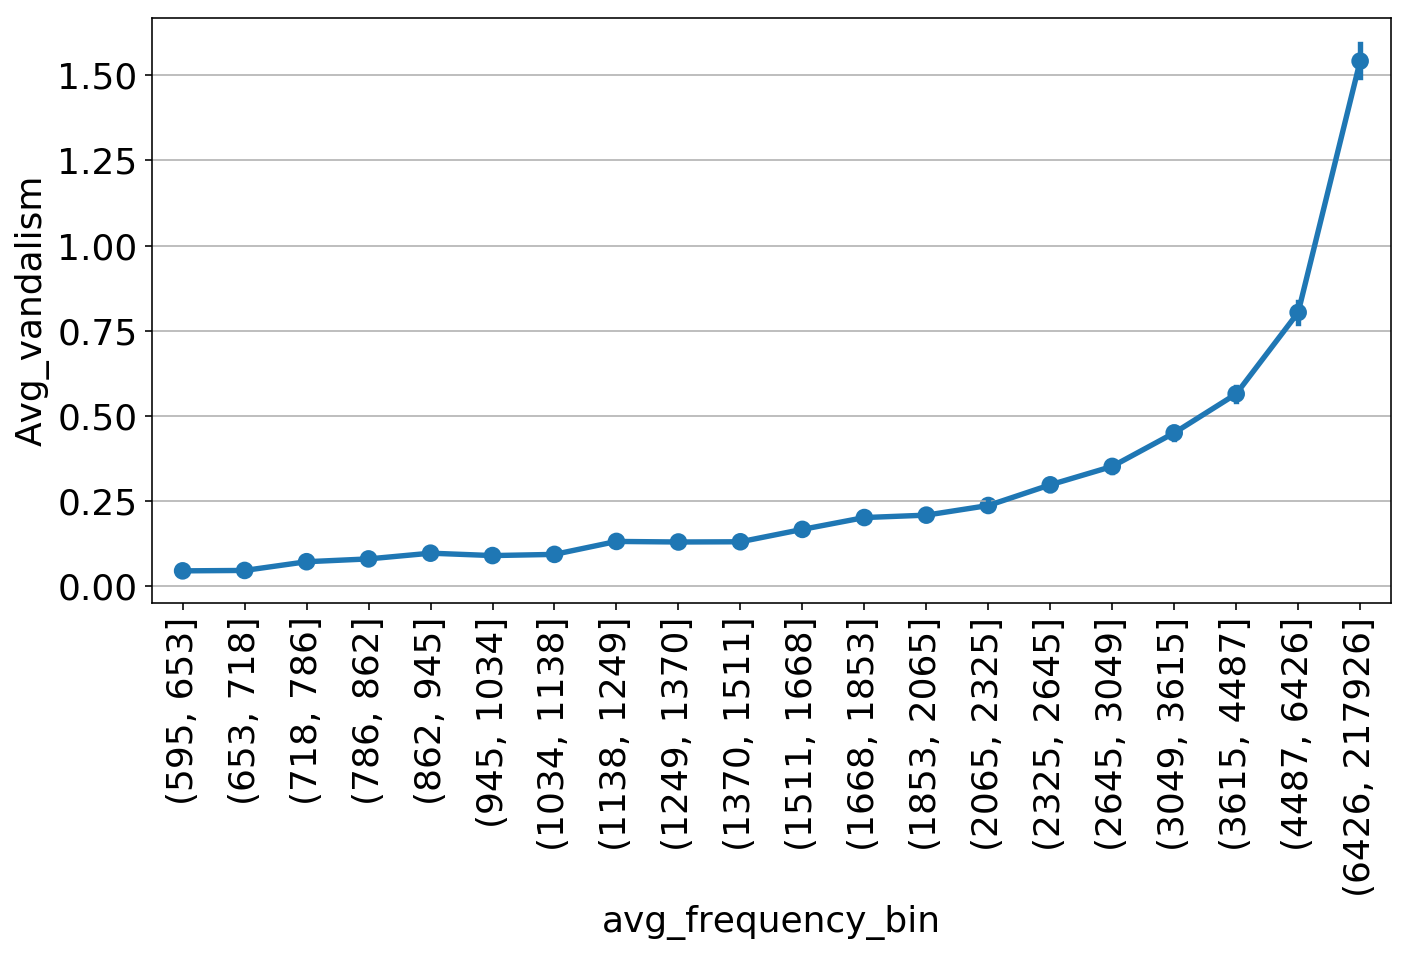

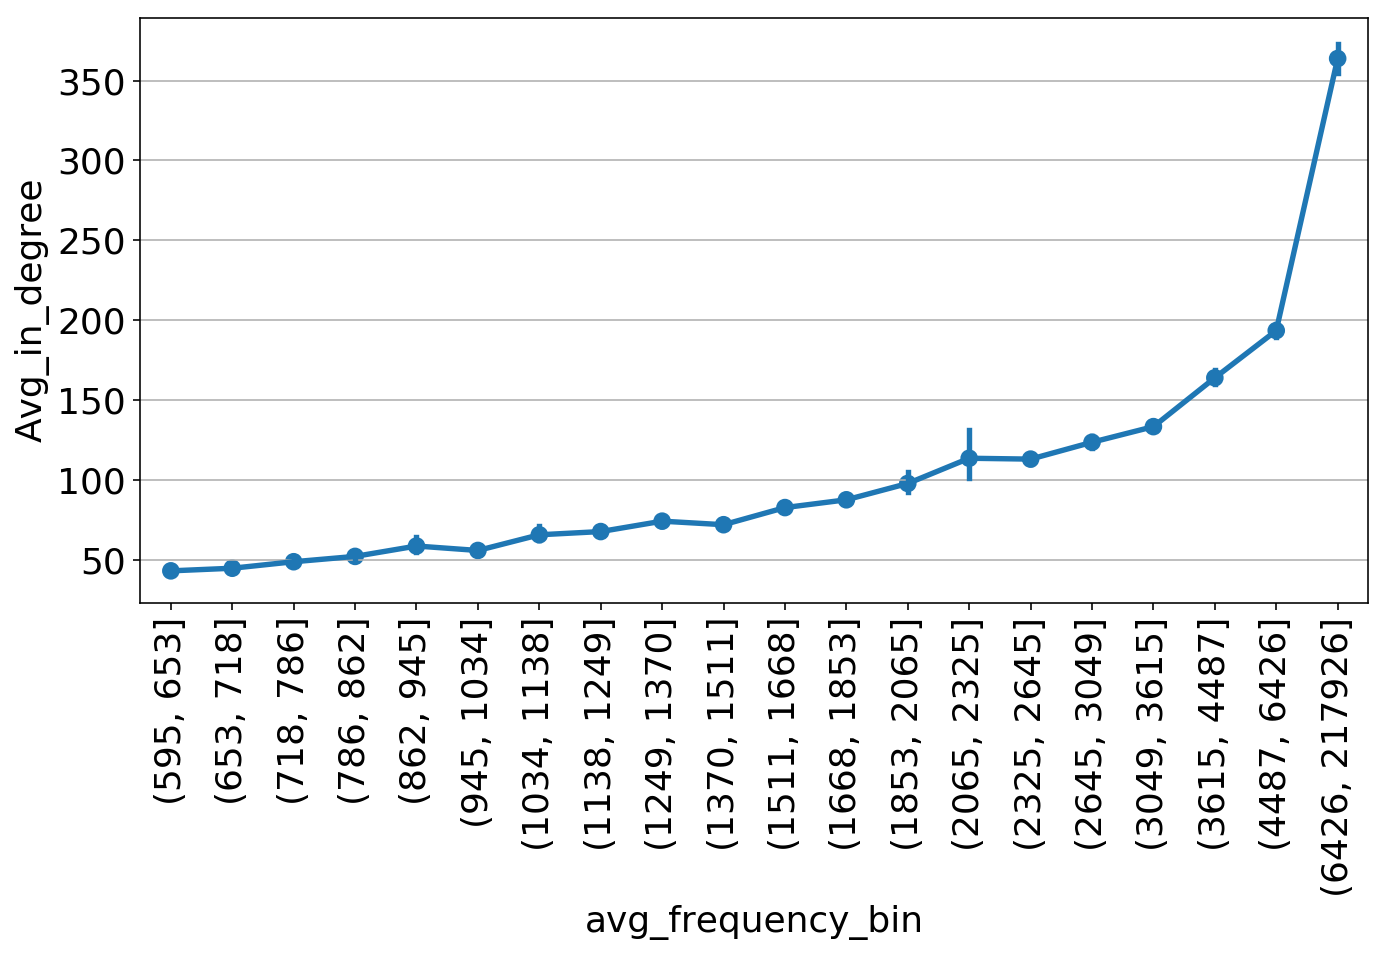

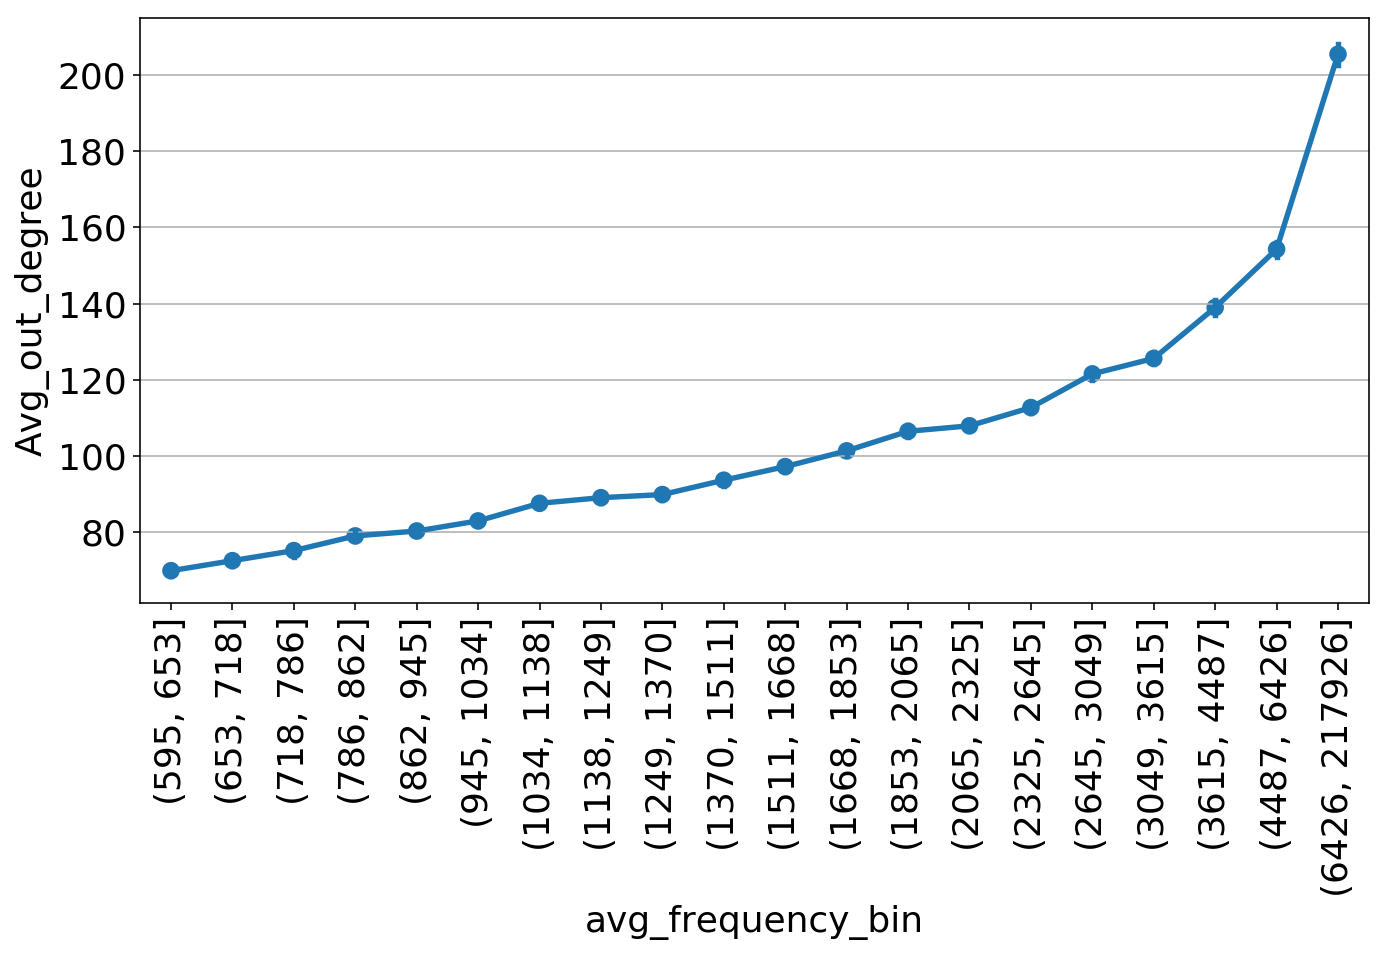

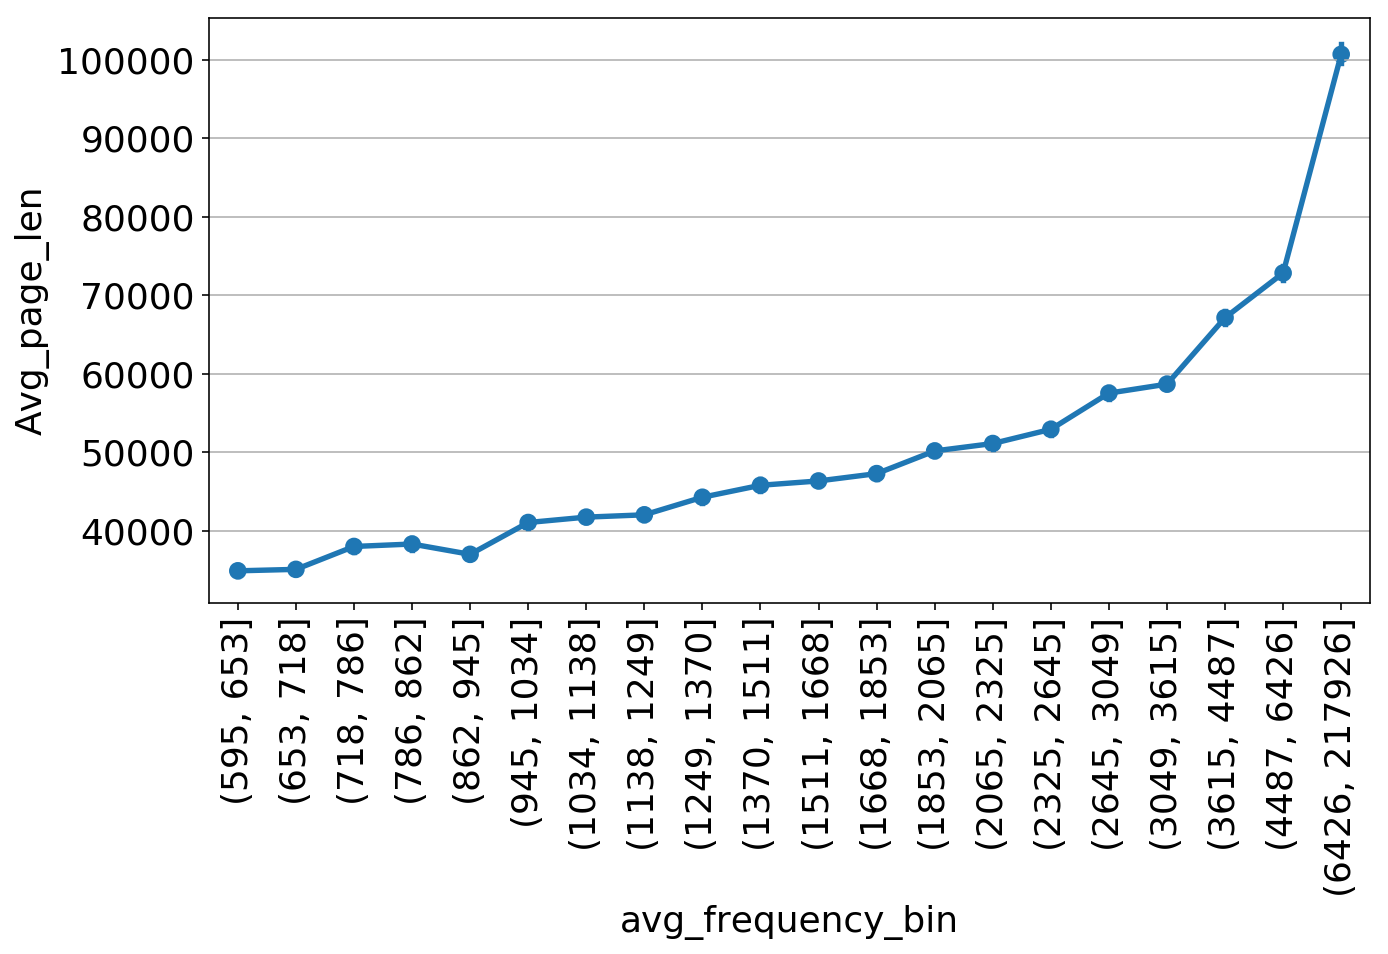

In [96]:
for column in list(visit_count_df.columns)[2:-2]:
    plt.figure(figsize=(10,7))
    sns.pointplot(x='avg_frequency_bin', y='Avg_'+column,data=category_visit_df)
    plt.xticks(rotation='vertical')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.savefig('./plots/category_frequency_%s.png'%column,dpi=400)
    plt.show()

In [122]:
visit_count_df['frequency_bin'] = pandas.cut(visit_count_df['frequency'], seperate_list(visit_count_df['frequency'].values,20))

3189


In [123]:
visit_count_df.columns

Index(['category_num', 'frequency', 'image_num', 'language_num', 'link_num',
       'update', 'vandalism', 'in_degree', 'out_degree', 'page_len', 'Title',
       'frequency_bin'],
      dtype='object')

In [124]:
seperate_list(visit_count_df['out_degree'].values,2)

31891


[0.0, 53.0, 1610.0]

In [125]:
visit_count_df['out_degree_bin'] = pandas.cut(visit_count_df['out_degree'], seperate_list(visit_count_df['out_degree'].values,20))

3189


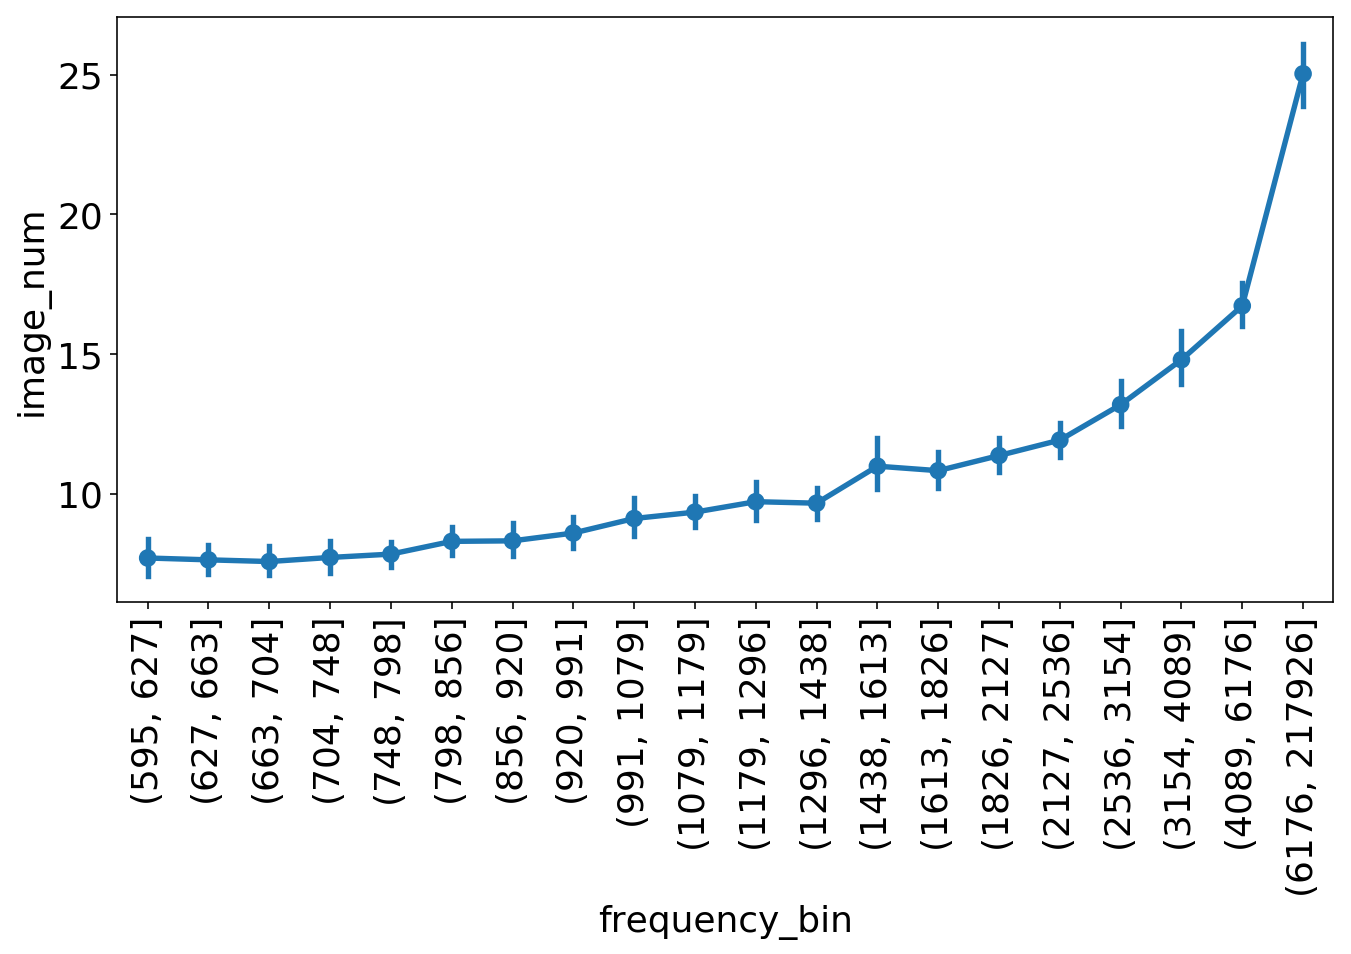

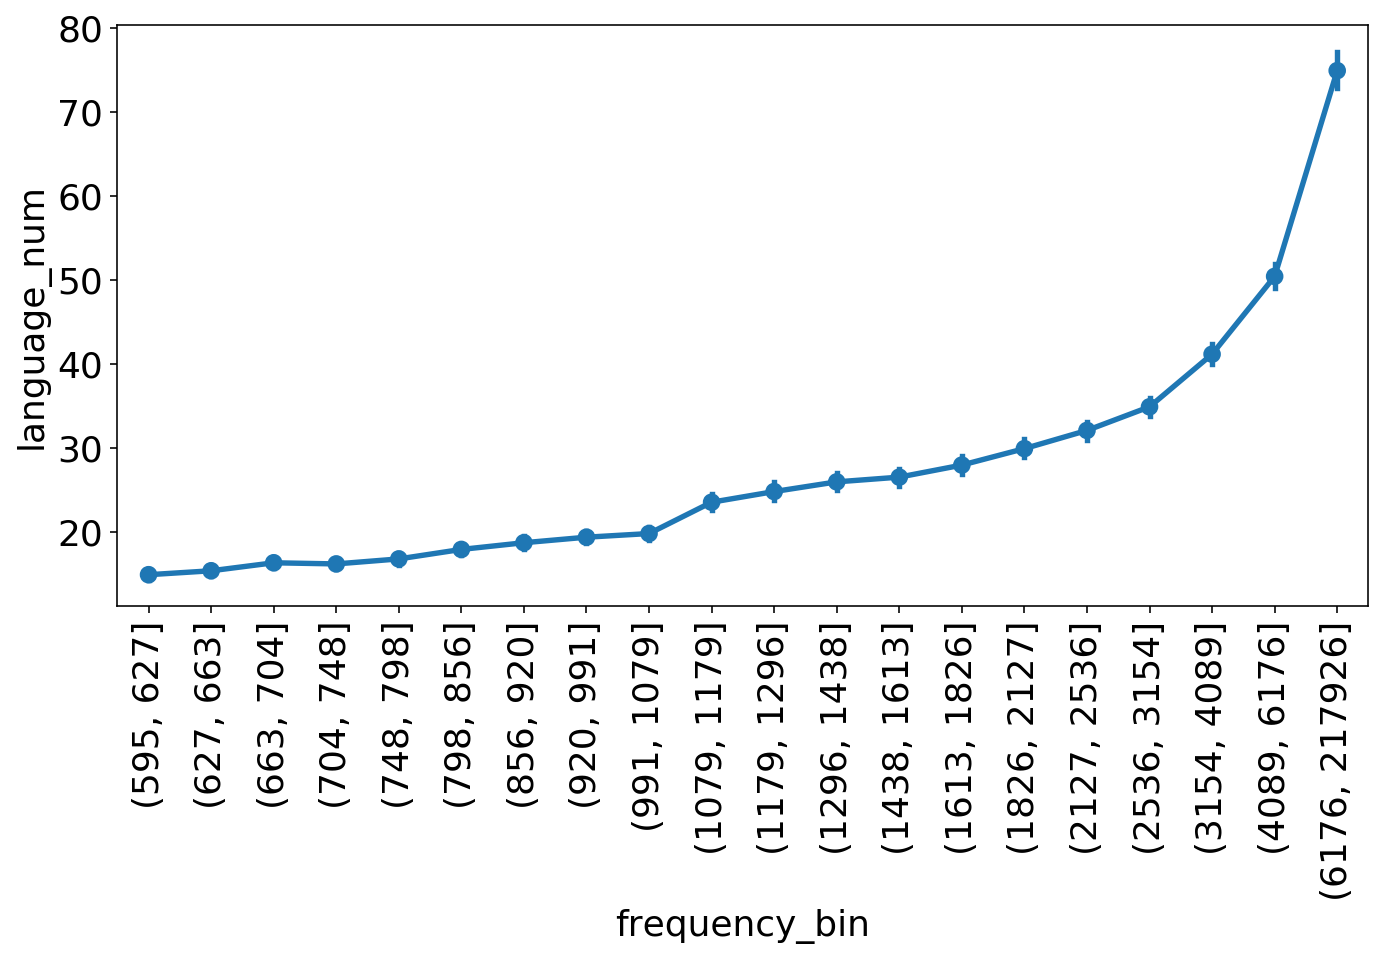

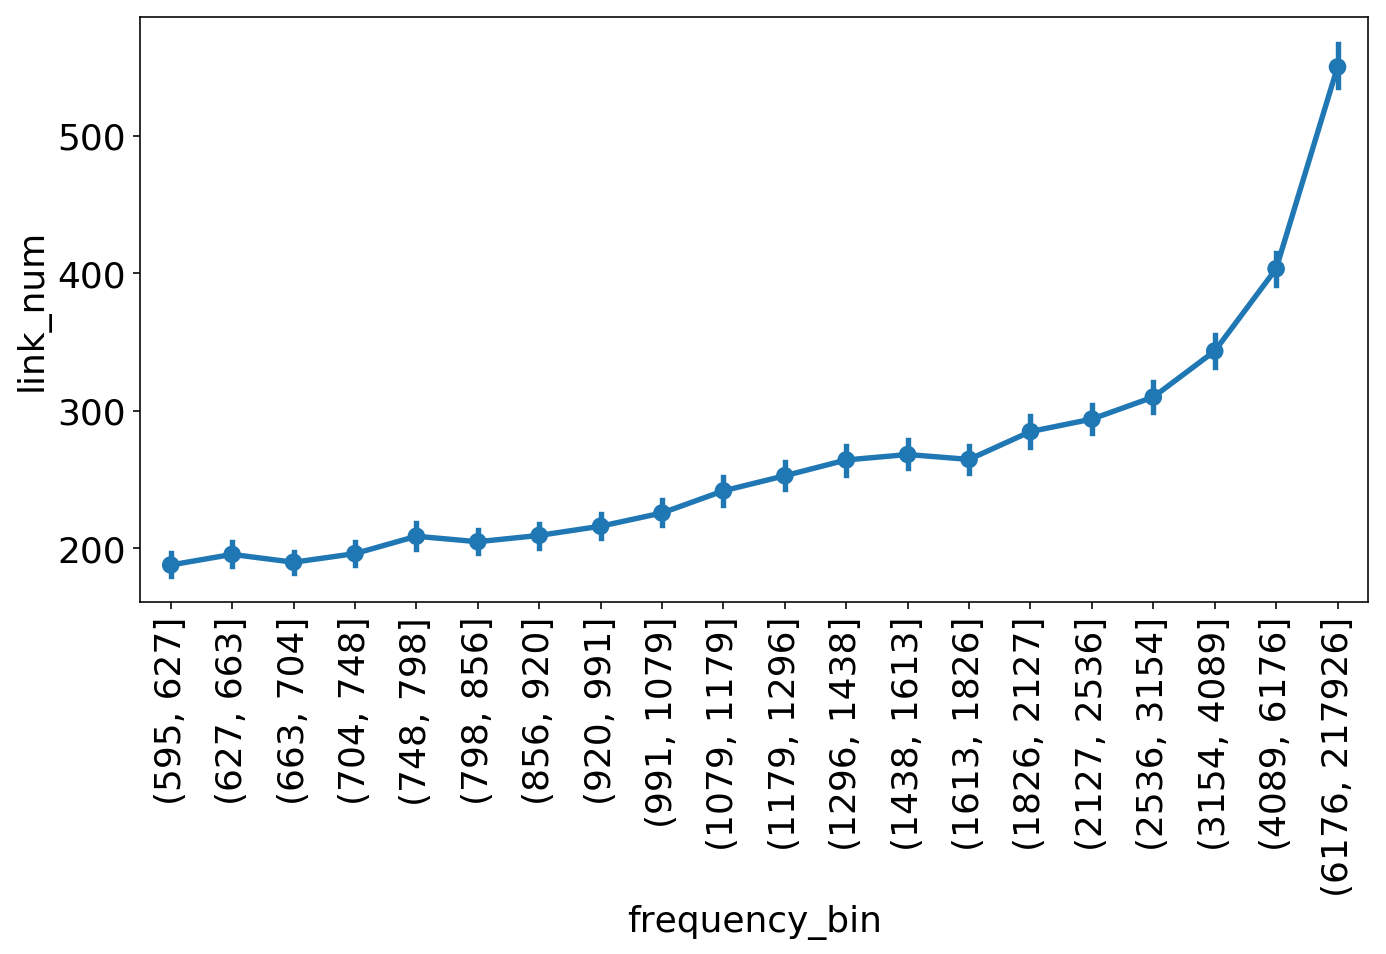

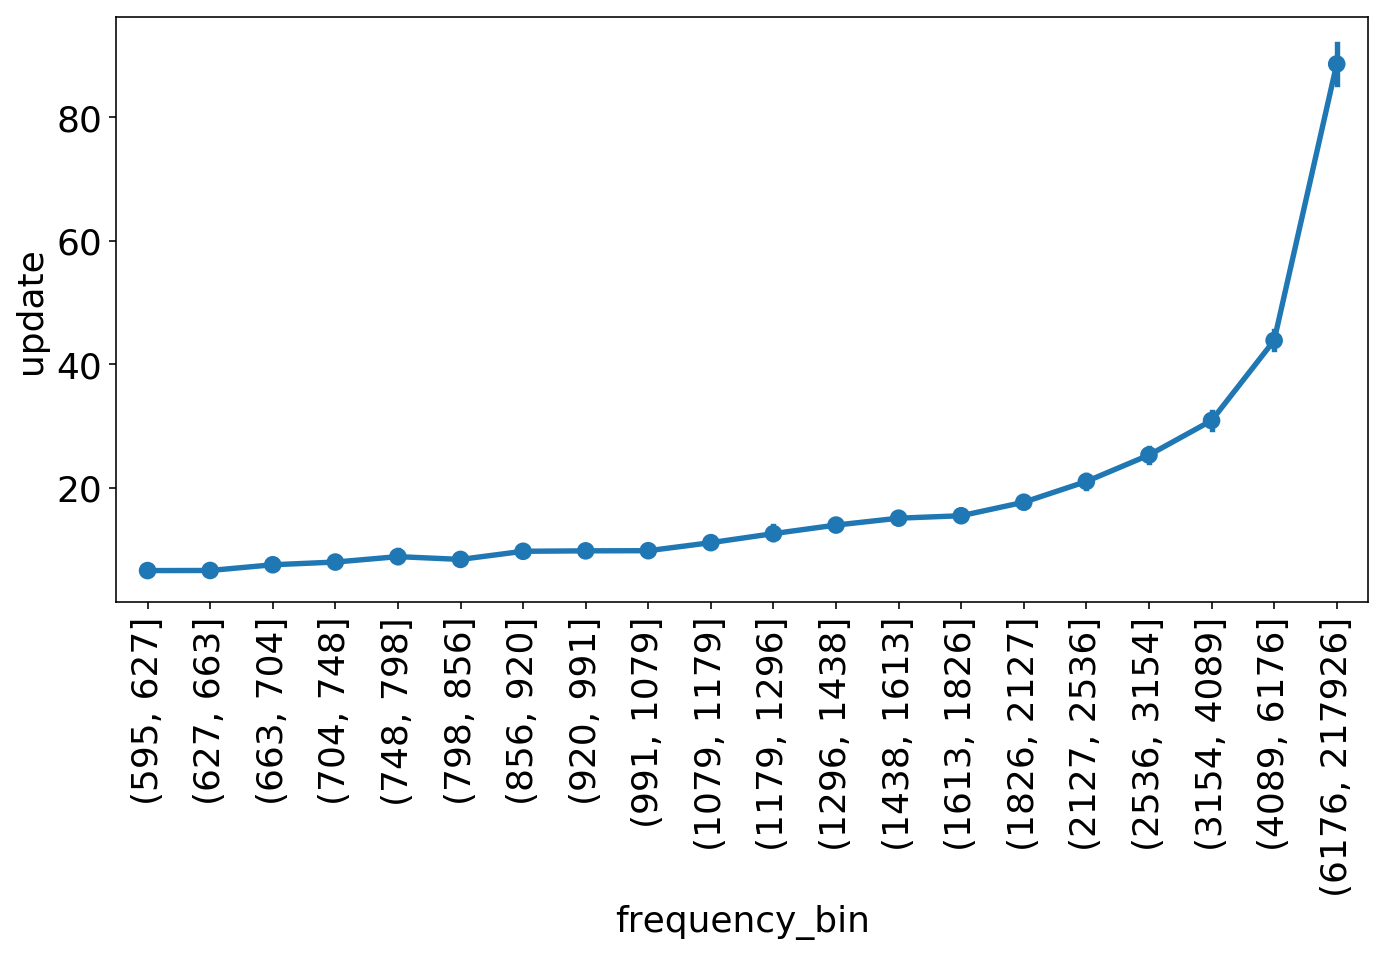

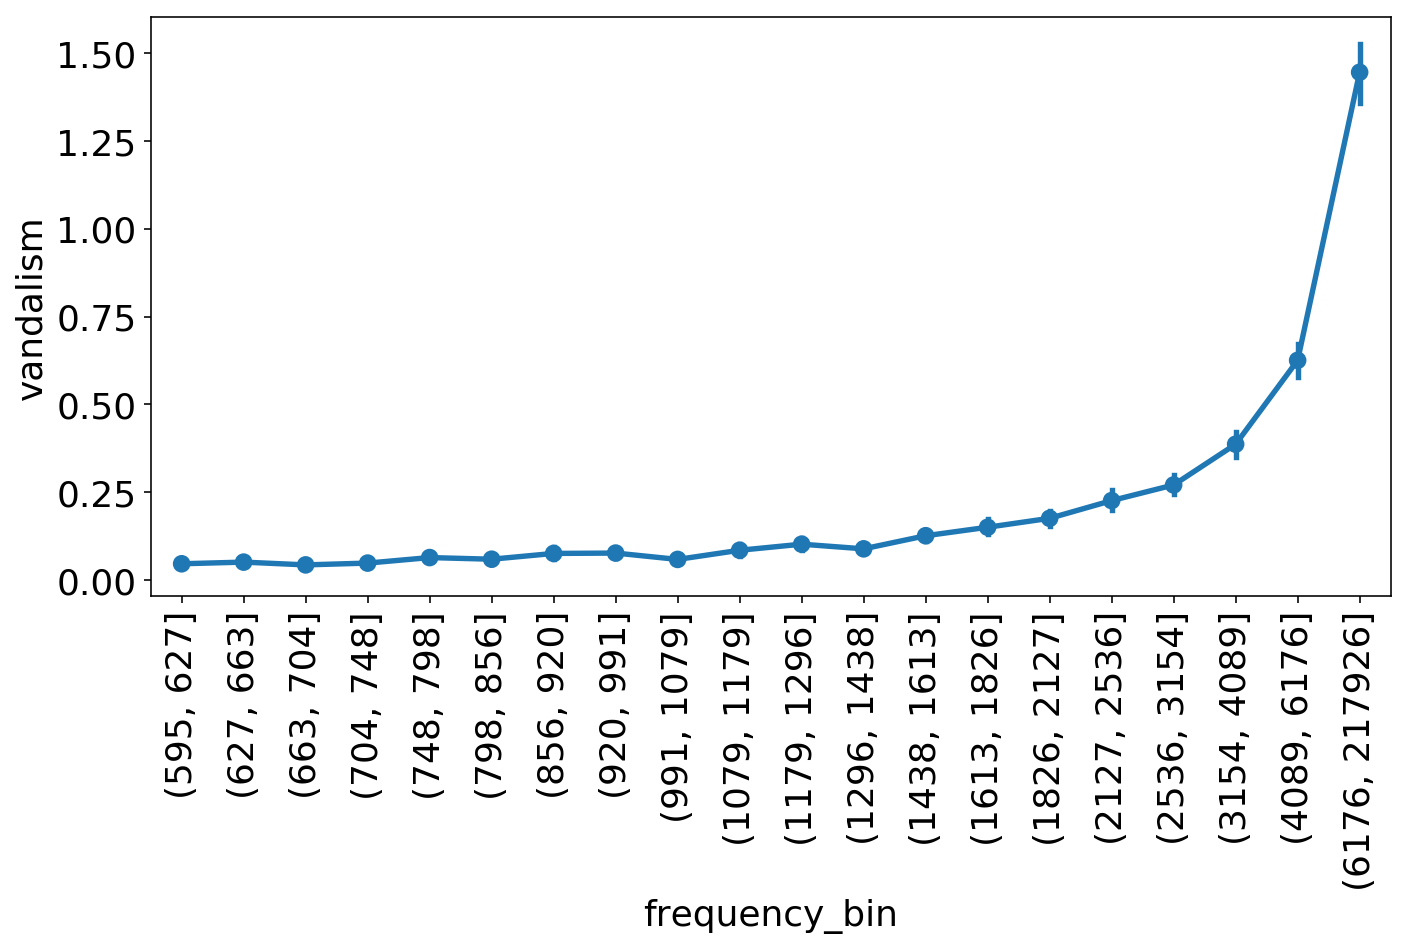

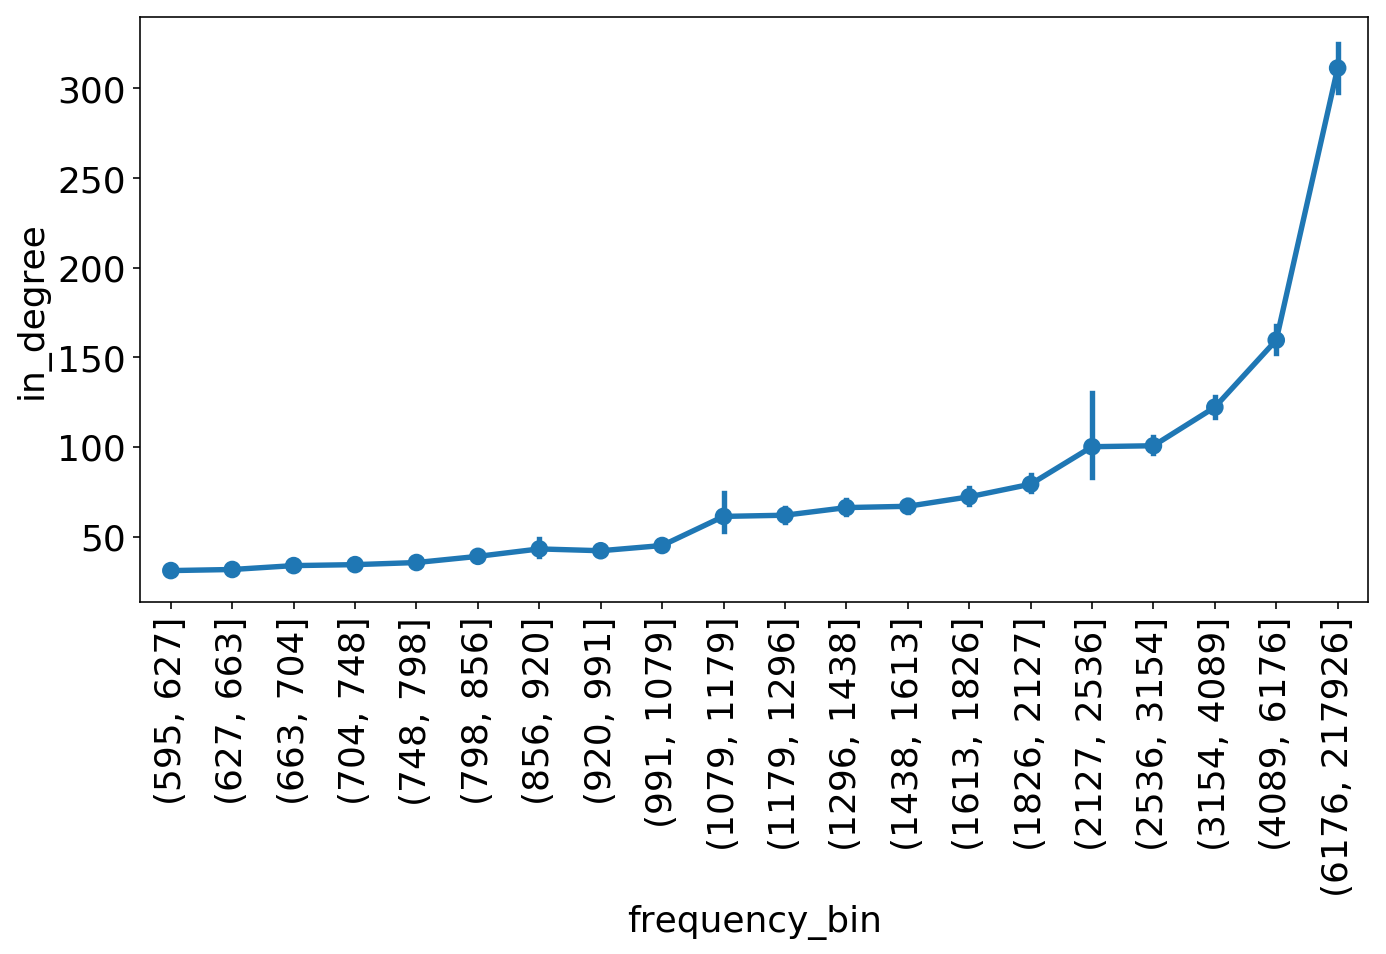

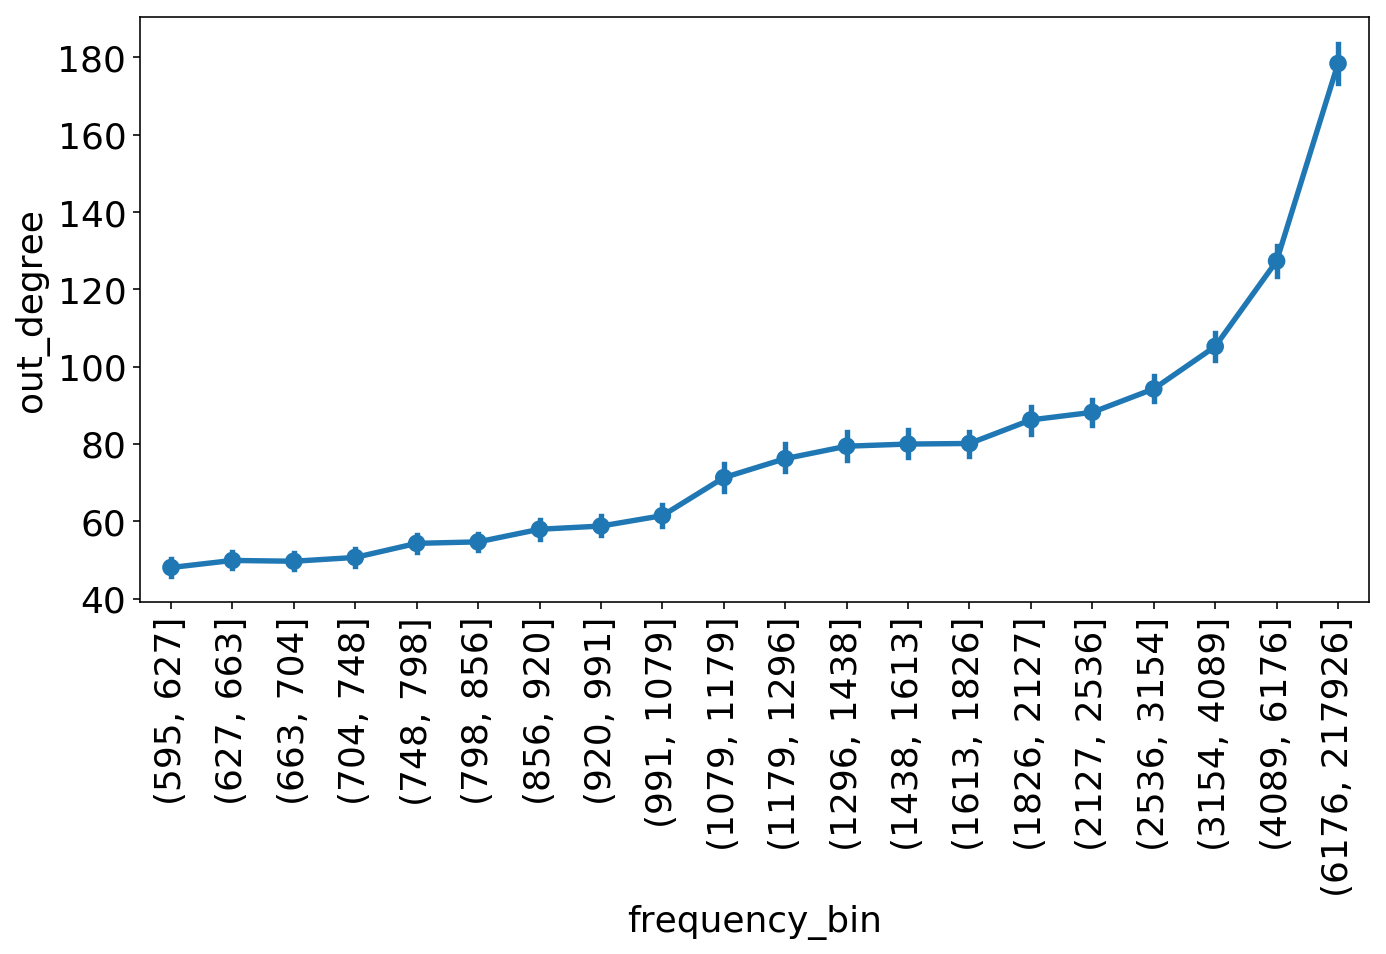

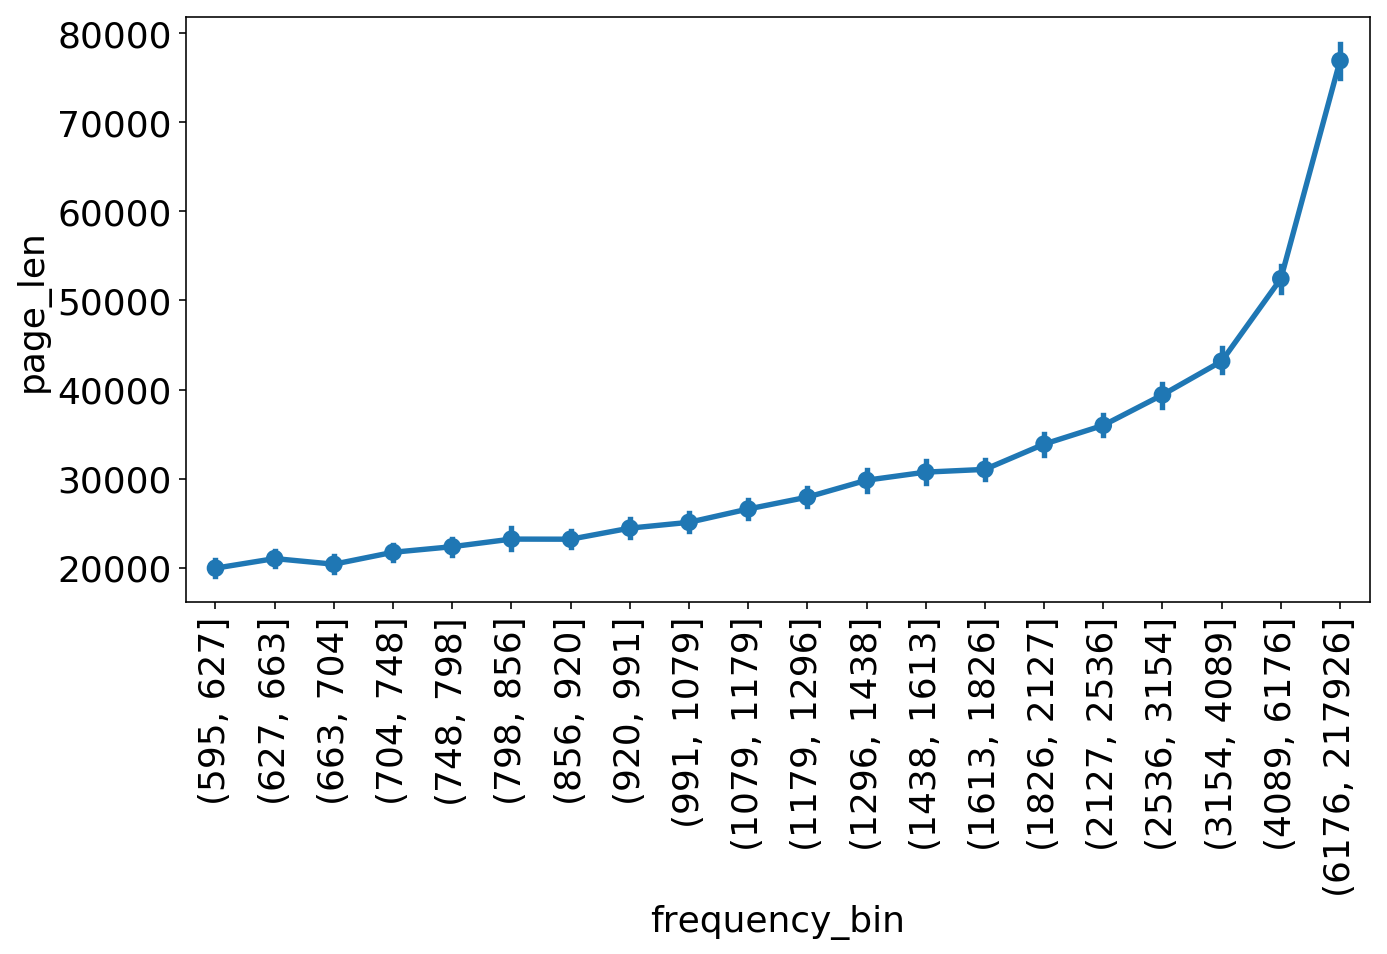

In [97]:
for column in list(visit_count_df.columns)[2:-2]:
    plt.figure(figsize=(10,7))
    sns.pointplot(x='frequency_bin', y=column,data=visit_count_df)
    plt.xticks(rotation='vertical')
    plt.tight_layout()
    plt.savefig('./plots/title_frequency_%s.png'%column,dpi=400)
    plt.show()

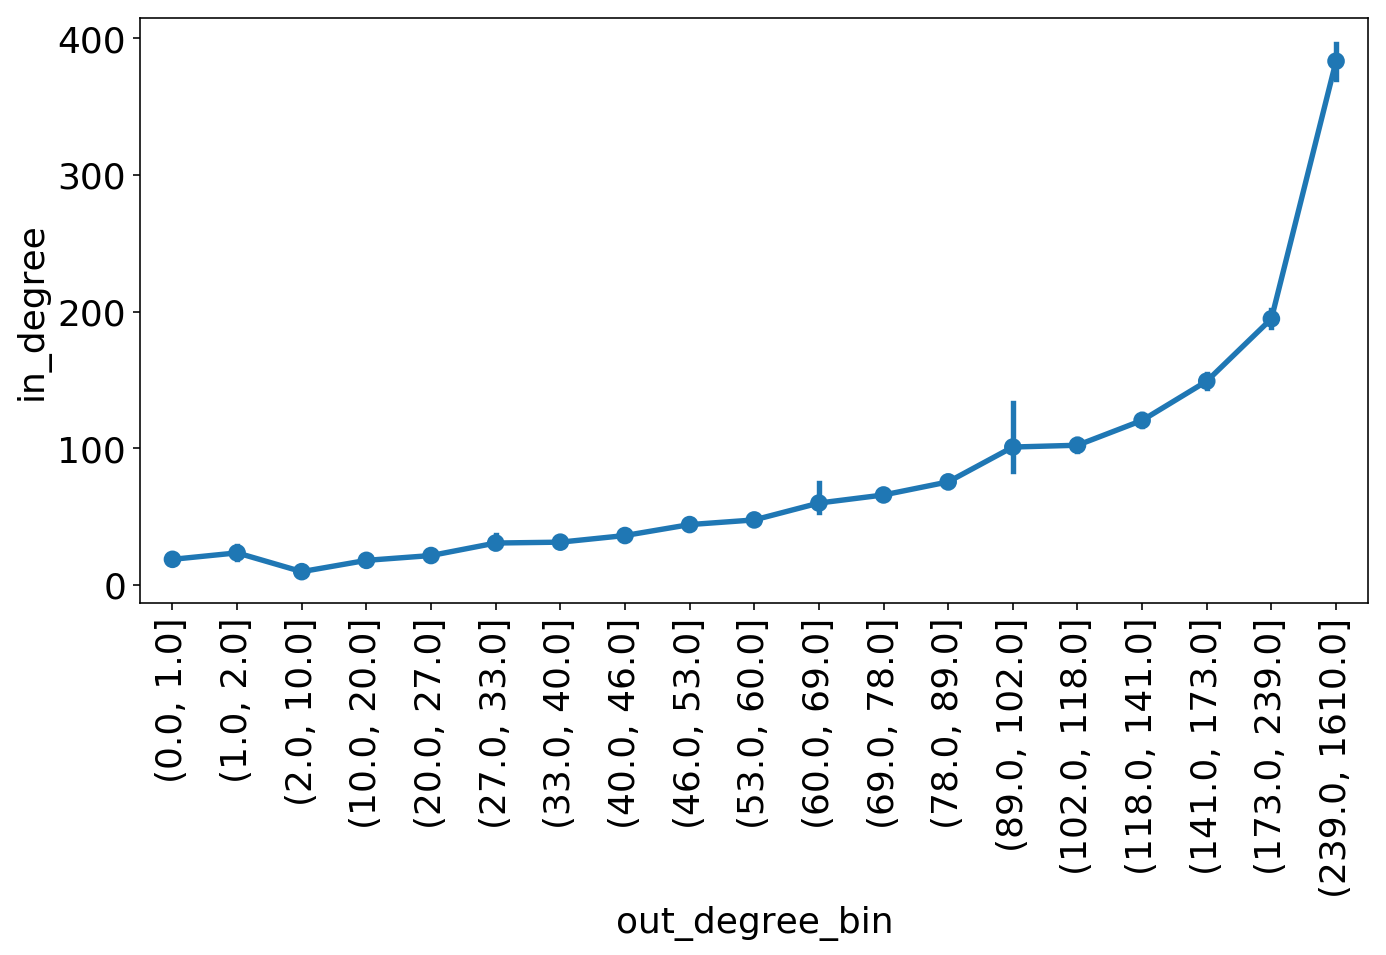

In [126]:
plt.figure(figsize=(10,7))
sns.pointplot(x='out_degree_bin', y='in_degree',data=visit_count_df)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.savefig('./plots/title_frequency_%s.png'%column,dpi=400)
plt.show()